# l. Exploration Data Analysis (EDA)

In this script an attempt to explore the data for better Understanding.

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

The task is to forecast the total amount of products sold in every shop for the test set in November 2015.

In [58]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 


In [59]:
DATA_FOLDER = 'C:/Users/Karam/Downloads/Competition/DataSet'

transactions      = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items             = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories   = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops             = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))
test              = pd.read_csv(os.path.join(DATA_FOLDER, 'test.csv.gz'))
sample_submission = pd.read_csv(os.path.join(DATA_FOLDER, 'sample_submission.csv.gz'))
train             = pd.read_pickle(os.path.join(DATA_FOLDER,'train.pkl'))

In [3]:
sample_submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


## Submitting all ones prediction

In [4]:
pd.DataFrame({'ID':test.ID, 'item_cnt_month':np.ones((test.shape[0]),dtype='int64')}).set_index('ID').to_csv('sub.csv')

The submission of all ones scored 1.41241 in the LeaderBoard

Some useful tricks for ipython display

```python
# Set ipython's max row display
pd.set_option('display.max_row', 1000)
# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)
```

# 1.Task1

Explore the train & test sets

In [5]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [6]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [7]:
print('train shape:', train.shape)
print('test shape:', test.shape)

train shape: (2935849, 6)
test shape: (214200, 3)


### 1.1 Comparing the shop_id

In [8]:
test_shop_id = np.sort(test.shop_id.unique())

In [9]:
print('test length:', len(test_shop_id), '; array:' ,test_shop_id)

test length: 42 ; array: [ 2  3  4  5  6  7 10 12 14 15 16 18 19 21 22 24 25 26 28 31 34 35 36 37 38
 39 41 42 44 45 46 47 48 49 50 52 53 55 56 57 58 59]


In [10]:
train_shop_id = np.sort(train.shop_id.unique())

In [11]:
print('train length:', len(train_shop_id), '; array:' ,train_shop_id)

train length: 60 ; array: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59]


In [12]:
np.array_equal(test_shop_id,train_shop_id)  # test if same shape, same elements values

False

In [13]:
diff_shops = []
for _ in train_shop_id:
    if _ not in test_shop_id:
        diff_shops.append(_)
        
print('The shop_id that is in train but not in test set:', diff_shops)

The shop_id that is in train but not in test set: [0, 1, 8, 9, 11, 13, 17, 20, 23, 27, 29, 30, 32, 33, 40, 43, 51, 54]


###  1.2 Comparing the item_id

In [14]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [15]:
test_item_id = np.sort(test.item_id.unique())
print('test length:', len(test_item_id), '; array:' ,test_item_id)

test length: 5100 ; array: [   30    31    32 ..., 22164 22166 22167]


In [16]:
train_item_id = np.sort(train.item_id.unique())
print('test length:', len(train_item_id), '; array:' ,train_item_id)

test length: 21807 ; array: [    0     1     2 ..., 22167 22168 22169]


In [17]:
diff_items = []
for _ in train_item_id:
    if _ not in test_item_id:
        diff_items.append(_)
        
print('diff length:', len(diff_items),'The item_id that is in train but not in test set:', diff_items)

diff length: 17070 The item_id that is in train but not in test set: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 34, 35, 36, 37, 39, 40, 41, 43, 44, 46, 47, 48, 49, 50, 52, 54, 55, 56, 58, 60, 61, 63, 65, 66, 68, 71, 73, 74, 75, 77, 78, 79, 81, 82, 84, 85, 86, 87, 89, 90, 92, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 169, 170, 171, 172, 174, 175, 176, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 203, 206, 207, 208, 209, 210, 211, 212, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 227, 228, 229, 230, 231, 232, 233, 235, 236, 238, 239, 240, 241, 242, 24

In [18]:
diff_items_test = []
for _ in test_item_id:
    if _ not in train_item_id:
        diff_items_test.append(_)
        
print('diff length:', len(diff_items_test),'The item_id that is in test but not in train set:', diff_items_test)

diff length: 363 The item_id that is in test but not in train set: [83, 140, 168, 173, 204, 237, 249, 254, 302, 402, 428, 430, 454, 480, 566, 639, 640, 762, 892, 900, 907, 1184, 1193, 1246, 1252, 1253, 1254, 1284, 1386, 1394, 1434, 1436, 1437, 1574, 1575, 1577, 1580, 1585, 1679, 1683, 1732, 1864, 1867, 1884, 1885, 2322, 2323, 2324, 2325, 2326, 2327, 2328, 2420, 2426, 2427, 2428, 2434, 2569, 2722, 2966, 3022, 3023, 3271, 3272, 3273, 3282, 3284, 3338, 3349, 3354, 3405, 3407, 3408, 3538, 3571, 3579, 3604, 3627, 3760, 3867, 3908, 3984, 4060, 4156, 4310, 4318, 4412, 4642, 4925, 5025, 5064, 5121, 5248, 5268, 5269, 5320, 5321, 5322, 5441, 5541, 5569, 5667, 5721, 5722, 5812, 5826, 5843, 5844, 5961, 5963, 6152, 6153, 6169, 6259, 6335, 6439, 6519, 6520, 6521, 6522, 6523, 6524, 6525, 6526, 6527, 6528, 6529, 6530, 6531, 6532, 6533, 6645, 6729, 6730, 6731, 6732, 6733, 6734, 6742, 6743, 6863, 6891, 6903, 6996, 7094, 7124, 7572, 7592, 7607, 7646, 7647, 7669, 7727, 7728, 7729, 7730, 7766, 7782, 7862, 

### 1.3 Conclusion

- There are no missing values in shop_id in the test set
- There are 363 items missing in the train set and found in the test set

### 1.4 Visualization

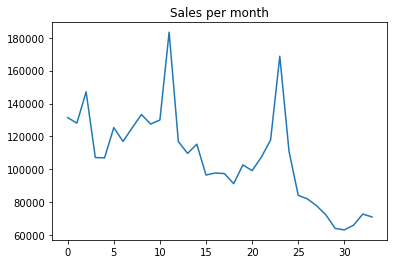

In [12]:
plt.plot(train.groupby('date_block_num').sum()['item_cnt_day'])
plt.title('Sales per month')

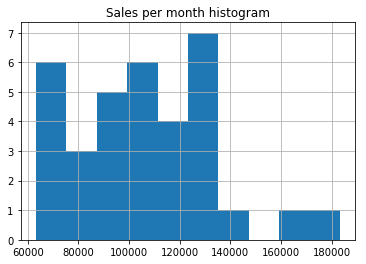

In [54]:
train.groupby('date_block_num').sum()['item_cnt_day'].hist()
plt.title('Sales per month histogram')

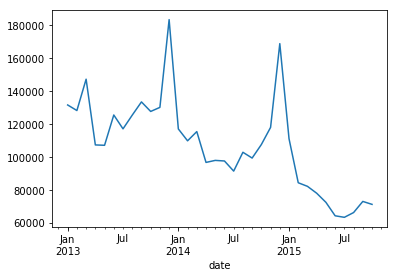

In [55]:
#another way to plot the sales per month
train.copy().set_index('date').item_cnt_day.resample('M').sum().plot()

In [60]:
#seperating the date to year, month and day in columns
train['month']  = train['date'].dt.month
train['year']   = train['date'].dt.year
train['day']    = train['date'].dt.day

In [21]:
month_2014 = []
for i in np.arange(1,13,1):
    month_2014.append(train.loc[(train['year'] == 2014) & (train['month'] == i), ['item_cnt_day']].mean())
    
month_2013 = []
for i in np.arange(1,13,1):
    month_2013.append(train.loc[(train['year'] == 2013) & (train['month'] == i), ['item_cnt_day']].mean())

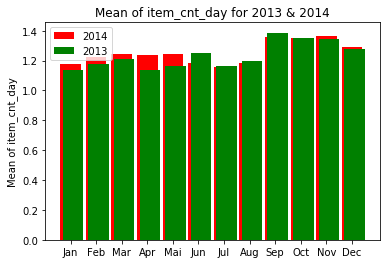

In [22]:
N = np.arange(1,13,1)
months = ['Jan','Feb','Mar','Apr','Mai','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.title('Mean of item_cnt_day for 2013 & 2014')
plt.ylabel('Mean of item_cnt_day')
plt.xticks(N,months)
plt.bar(N,np.array(month_2014), color= 'r', label = '2014')
plt.bar(N+.10,np.array(month_2013), color= 'g', label = '2013')
plt.legend()
plt.show()

In [16]:
Nov_2014 = train.loc[(train['year'] == 2014) & (train['month'] == 11), ['item_cnt_day']]
#print(Nov_2014)

In [61]:
print('item_price min:',train.item_price.min())
print('item_price max:',train.item_price.max())
print('item_price mean:',train.item_price.mean())
print('item_price median:',train.item_price.median())

item_price min: -1.0
item_price max: 307980.0
item_price mean: 890.8532326979881
item_price median: 399.0


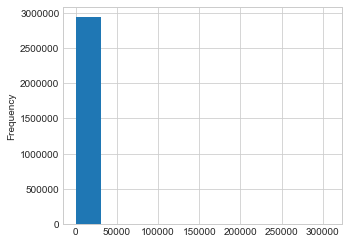

In [65]:
from pandas.tools.plotting import scatter_matrix
from pylab import rcParams
import seaborn as sb

rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

train.item_price.plot(kind = 'hist')
#plt.hist(train.item_price) #another approach
#train.item_price.hist() #another approach
# sb.distplot(train.item_price) # another approach

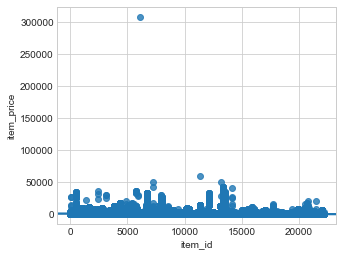

In [78]:
sb.regplot(x=train.item_id,y='item_price', data=train, scatter='True')
# train.plot(kind = 'scatter', x = 'item_id', y = 'item_price')
#train.item_price.plot()

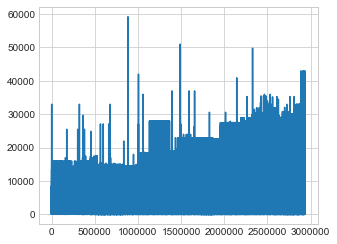

In [86]:
train.item_price.plot()

In [82]:
# -1 and 307980 looks like outliers, let's delete them
print('before train shape:', train.shape)
train = train[(train.item_price > 0) & (train.item_price < 300000)]
print('after train shape:', train.shape)

before train shape: (2935849, 9)
after train shape: (2935847, 9)


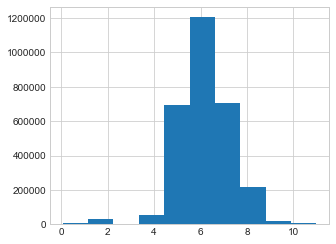

In [85]:
# https://stackoverflow.com/questions/49538185/what-is-the-purpose-of-numpy-log1p
train.item_price.map(np.log1p).hist()
#sb.distplot(train.item_price.map(np.log1p))

### Generate a Scatter plot Matrix

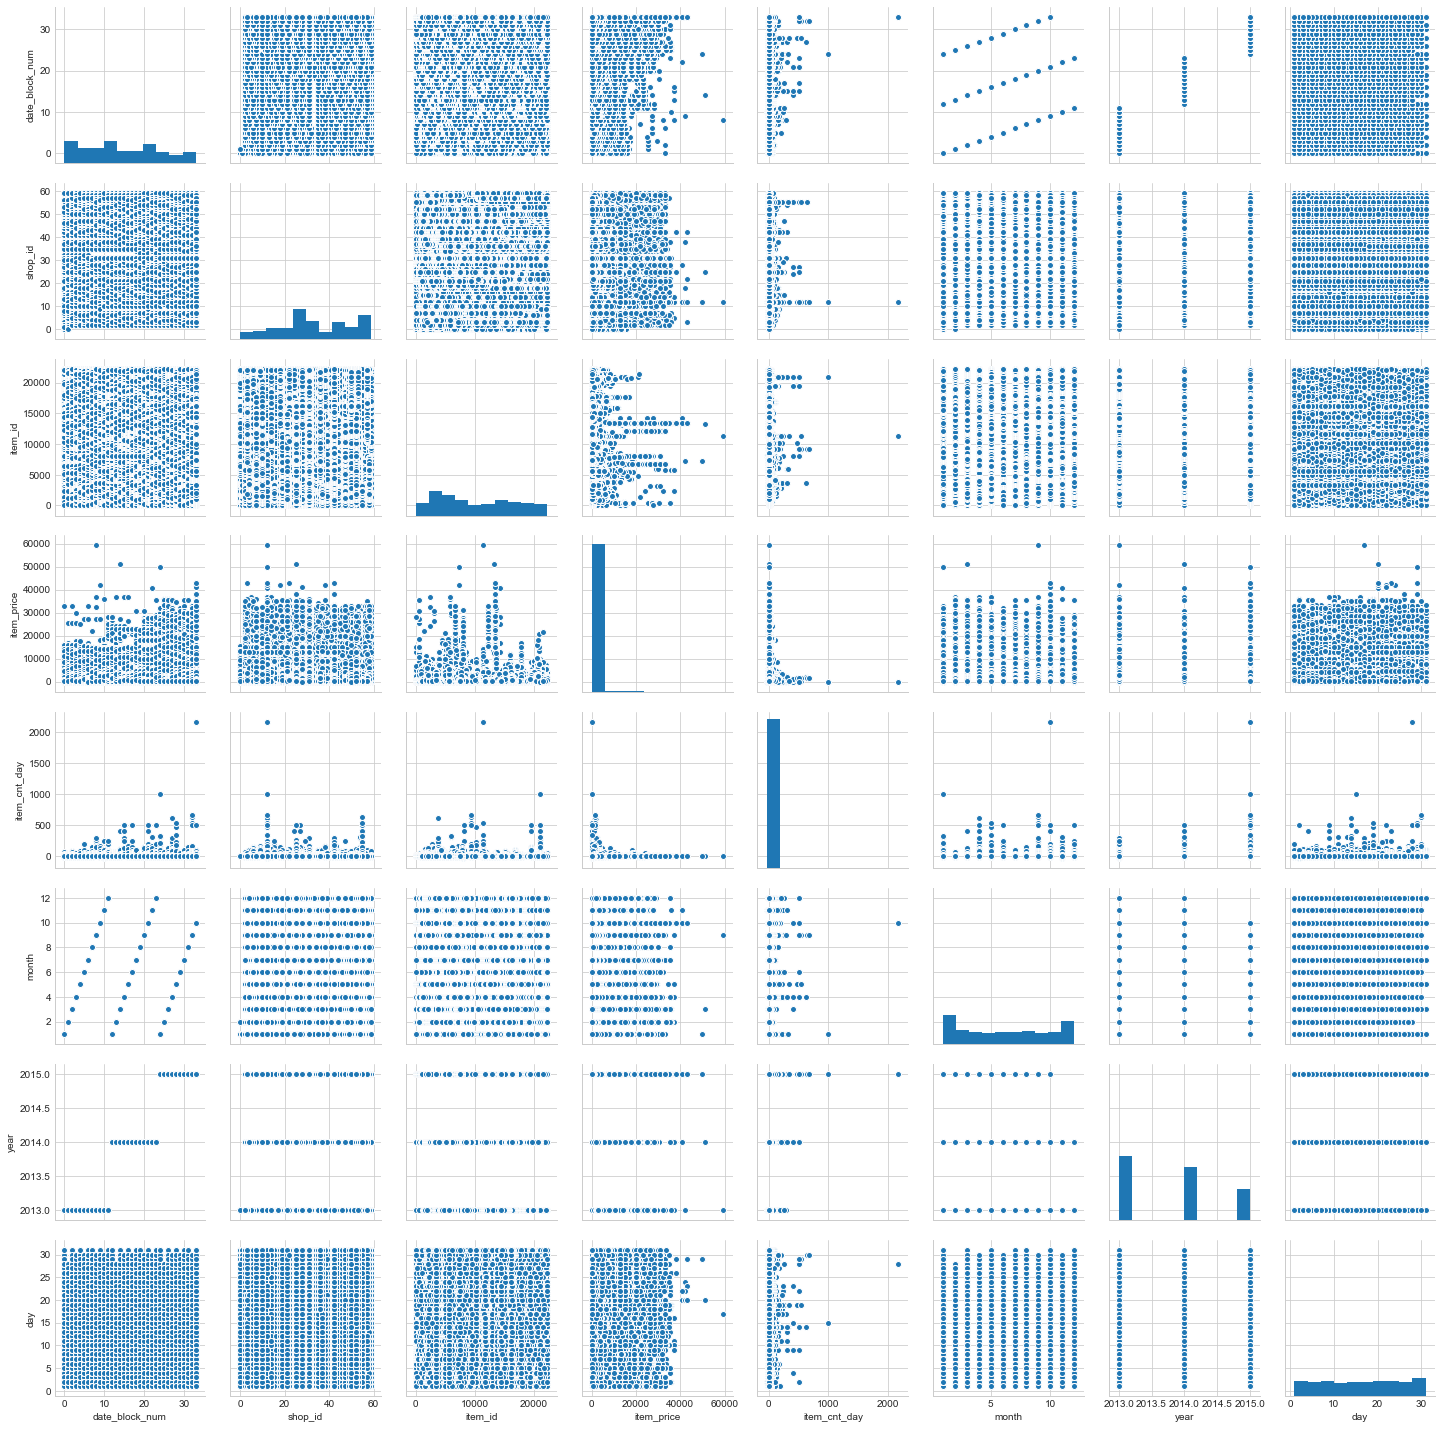

In [84]:
sb.pairplot(train)

In [ ]:
# Outlier in the item_cnt_day
train[train.item_cnt_day<=1000] # there is only 1 item

# ll. Feature Generation

1- Generating a train data match the test data, since the test data consists of item_id & shop_id

In [91]:
from itertools import product

index_cols = ['shop_id', 'item_id', 'date_block_num']

#Compute all shops/items combinations
grid = []
for block_num in train['date_block_num'].unique():
    cur_shops = train.loc[train['date_block_num'] == block_num, 'shop_id'].unique()
    cur_items = train.loc[train['date_block_num'] == block_num, 'item_id'].unique()
    grid.append(np.array(list(product(*[cur_shops, cur_items, [block_num]])),dtype='int32'))
grid = pd.DataFrame(np.vstack(grid), columns = index_cols,dtype=np.int32)

In [92]:
grid.head()

,shop_id,item_id,date_block_num
0,59,22154,0
1,59,2552,0
2,59,2554,0
3,59,2555,0
4,59,2564,0


2- Since the competition task is to make a monthly prediction, we need to aggregate the data to montly level before doing any encodings.

In [93]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [95]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [106]:
print(np.sort(items.item_category_id.unique()))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83]


In [108]:
print(np.sort(item_categories.item_category_id))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83]


In [126]:
sales_m = train.groupby(['date_block_num','shop_id','item_id']).agg({'item_cnt_day': 'sum','item_price': 'mean'}).reset_index()
sales_m = pd.merge(grid, sales_m, on = ['date_block_num', 'shop_id', 'item_id'], how='left').fillna(0)

sales_m = pd.merge(sales_m,items, on = ['item_id'], how='left')
sales_m = pd.merge(sales_m,item_categories, on = ['item_category_id'], how='left')

In [127]:
sales_m.head()

,shop_id,item_id,date_block_num,item_cnt_day,item_price,item_name,item_category_id,item_category_name
0,59,22154,0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,59,2552,0,0.0,0.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,59,2554,0,0.0,0.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
3,59,2555,0,0.0,0.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства
4,59,2564,0,0.0,0.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,Музыка - Музыкальное видео
